<a href="https://colab.research.google.com/github/Sai0472003/PatentLitigation_Impact/blob/main/Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Basic Data Loading and Cleaning

In [ ]:
plt_rnd = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/tenQs_plt_rnd.csv')
plt_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/tenQs_plt_npm.csv')

def_rnd = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/tenQs_def_rnd.csv')
def_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/tenQs_def_npm.csv')

In [ ]:
#loading pre-cleaned csv files
clean_plaintiff_RnD = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_plaintiff_RnD.csv')
clean_plaintiff_RnD = clean_plaintiff_RnD[['case_number', 'filing_quarter_rnd',
                                           'closing_quarter_rnd', 'delta_rnd_sales',
                                           'state_province','case_length','materials',
                                           'industrials', 'consumer_discretionary',
                                           'info_tech', 'health_care']]

clean_defendent_RnD = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_defendent_RnD.csv')
clean_defendent_RnD = clean_defendent_RnD[['case_number', 'filing_quarter_rnd',
                                           'closing_quarter_rnd', 'delta_rnd_sales',
                                           'state_province','case_length','materials',
                                           'industrials', 'consumer_discretionary',
                                           'info_tech', 'health_care']]



clean_plaintiff_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_plaintiff_npm.csv')
clean_plaintiff_npm = clean_plaintiff_npm[['case_number', 'filing_quarter_rnd',
                                           'closing_quarter_rnd', 'delta_rnd_sales',
                                           'state_province','case_length','materials',
                                           'industrials', 'consumer_discretionary',
                                           'info_tech', 'health_care']]

clean_defendent_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_defendent_npm.csv')
clean_defendent_npm = clean_defendent_npm[['case_number', 'filing_quarter_rnd',
                                           'closing_quarter_rnd', 'delta_rnd_sales',
                                           'state_province','case_length','materials',
                                           'industrials', 'consumer_discretionary',
                                           'info_tech', 'health_care']]


pd.set_option('display.max_columns', None)

In [ ]:
#adding defendant/plaintiff dummies and cocat merging into single df
clean_plaintiff_npm['plaintiff'] = 1
clean_defendent_npm['defendant'] = 1

npm = pd.concat([clean_defendent_npm, clean_plaintiff_npm], axis=0)
npm['defendant'] = npm['defendant'].fillna(0)
npm['plaintiff'] = npm['plaintiff'].fillna(0)

#converting case length variable from days to number of fin. quarters
npm['case_length'] = (npm['case_length']/91.25).astype(int).astype(float)

#filtering out extreme outliers
npm = npm[(npm['delta_npm'] > - 3) & (npm['delta_npm'] < 3)]


clean_plaintiff_RnD['plaintiff'] = 1
clean_defendent_RnD['defendant'] = 1

rnd = pd.concat([clean_defendent_RnD, clean_plaintiff_RnD], axis=0)
rnd['defendant'] = rnd['defendant'].fillna(0)
rnd['plaintiff'] = rnd['plaintiff'].fillna(0)


#converting case length variable from days to number of fin. quarters
rnd['case_length'] = (rnd['case_length']/91.25).astype(int).astype(float)

#filtring out extreme outliers in the data
rnd = rnd[(rnd['delta_rnd_sales'] > - 3) & (rnd['delta_rnd_sales'] < 3)]


In [ ]:
JFC_data = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/without_dummies_cases.csv')

JFC_data = JFC_data[['case_number', 'case_name','PLT', 'DEF', 'jurisdictional_basis',
                     'CIRCUIT', 'DISTRICT', 'OFFICE', 'JURY', 'NOS', 'CLASSACT',
                     'COUNTY', 'PROCPROG', 'DISP', 'NOJ', 'JUDGMENT']]

In [ ]:
npm = npm.merge(JFC_data, on='case_number', how='left')
rnd = rnd.merge(JFC_data, on='case_number', how='left')

In [ ]:
npm.head()

,case_number,filing_quarter_npm,closing_quarter_npm,delta_npm,minus_one_npm,minus_two_npm,minus_three_npm,plus_one_npm,plus_two_npm,plus_three_npm,state_province,case_length,materials,industrials,consumer_discretionary,info_tech,health_care,defendant,plaintiff,case_name,PLT,DEF,jurisdictional_basis,CIRCUIT,DISTRICT,OFFICE,JURY,NOS,CLASSACT,COUNTY,PROCPROG,DISP,NOJ,JUDGMENT
0,2:11-cv-01037,0.163247,0.226309,0.063062,0.208424,0.222403,0.228644,0.228330,0.227446,0.229692,TX,13.0,0,0,0,0,1,1.0,0.0,Carroll v. Texas Instruments Inc.(MAG+),CARROLL,TEXAS INSTRUMENTS INC.,Federal Question,11,27,2,B,830,0,1123,10,14,0,0
1,1:15-cv-01059,0.244910,0.796015,0.551105,-0.038337,0.002570,0.177977,0.783359,-0.105780,-0.160819,CA,7.0,0,0,1,0,0,1.0,0.0,Blazer v. Ebay Inc,BLAZER,EBAY INC,Federal Question,11,26,1,B,830,0,1029,10,13,0,0
2,5:11-cv-01349,0.051063,0.047465,-0.003598,0.051389,0.052812,0.056058,0.066061,0.066351,0.069411,MO,5.0,0,0,1,0,0,1.0,0.0,"Homtex, Inc v. Leggett & Platt, Inc et al","HOMTEX, INC","LEGGETT & PLATT, INC, ET AL",Federal Question,11,26,5,P,830,0,1043,10,13,0,0
3,2:87-cv-00979,0.010817,0.037153,0.026336,0.011557,0.016528,0.014094,0.034018,0.029158,0.023642,TX,8.0,0,1,0,0,0,1.0,0.0,Thrall Car Manufactu v. Trinity Industries,THRALL CAR MFG CO,TRINITY INDUSTRIES INC,Federal Question,11,26,2,-8,830,0,88888,5,13,-8,-8
4,1:17-cv-00179,0.208723,0.210924,0.002201,0.207433,0.207305,0.212408,0.211246,0.215499,0.220046,CA,1.0,0,0,0,0,1,1.0,0.0,"Pen-One Acquisition Group, LLC v. Apple Inc.","PEN-ONE ACQUISITION GROUP, LLC",APPLE INC.,Federal Question,11,28,1,B,830,0,1097,3,12,0,0


In [ ]:
rnd.head()

,case_number,filing_quarter_rnd,closing_quarter_rnd,delta_rnd_sales,minus_one_rnd,minus_two_rnd,minus_three_rnd,plus_one_rnd,plus_two_rnd,plus_three_rnd,state_province,case_length,materials,industrials,consumer_discretionary,info_tech,health_care,defendant,plaintiff,case_name,PLT,DEF,jurisdictional_basis,CIRCUIT,DISTRICT,OFFICE,JURY,NOS,CLASSACT,COUNTY,PROCPROG,DISP,NOJ,JUDGMENT
0,2:11-cv-01037,0.125210,0.100666,-0.024544,0.118179,0.117259,0.114605,0.098920,0.098242,0.098462,TX,13.0,0,0,0,0,1,1.0,0.0,Carroll v. Texas Instruments Inc.(MAG+),CARROLL,TEXAS INSTRUMENTS INC.,Federal Question,11,27,2,B,830,0,1123,10,14,0,0
1,1:15-cv-01059,0.108168,0.125455,0.017288,0.110958,0.111719,0.000000,0.124701,0.127940,0.125441,CA,7.0,0,0,1,0,0,1.0,0.0,Blazer v. Ebay Inc,BLAZER,EBAY INC,Federal Question,11,26,1,B,830,0,1029,10,13,0,0
2,5:11-cv-01349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005375,0.005953,0.006165,MO,5.0,0,0,1,0,0,1.0,0.0,"Homtex, Inc v. Leggett & Platt, Inc et al","HOMTEX, INC","LEGGETT & PLATT, INC, ET AL",Federal Question,11,26,5,P,830,0,1043,10,13,0,0
3,2:87-cv-00979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TX,8.0,0,1,0,0,0,1.0,0.0,Thrall Car Manufactu v. Trinity Industries,THRALL CAR MFG CO,TRINITY INDUSTRIES INC,Federal Question,11,26,2,-8,830,0,88888,5,13,-8,-8
4,1:17-cv-00179,0.049904,0.050520,0.000616,0.048885,0.048194,0.046701,0.050661,0.051407,0.052867,CA,1.0,0,0,0,0,1,1.0,0.0,"Pen-One Acquisition Group, LLC v. Apple Inc.","PEN-ONE ACQUISITION GROUP, LLC",APPLE INC.,Federal Question,11,28,1,B,830,0,1097,3,12,0,0


# Creating Useful Dummies for the JFC Categorical Data

In [ ]:
#using PROCPROG to create disp_before_issue_joined
npm['disp_before_issue_joined'] = 0
rnd['disp_before_issue_joined'] = 0

npm.loc[npm['PROCPROG'].isin([1,2,11,12]), 'disp_before_issue_joined'] = 1
rnd.loc[rnd['PROCPROG'].isin([1,2,11,12]), 'disp_before_issue_joined'] = 1

npm = npm.drop(columns=['PROCPROG'])
rnd = rnd.drop(columns=['PROCPROG'])

In [ ]:
#using DISP to create dummies for dissmissals, final judgment and case transfers

#For the npm df
npm['disp_dismissed'] = 0
npm['disp_judgment'] = 0
npm['disp_transfer'] = 0

npm.loc[npm['DISP'].isin([0,1,10,11]), 'disp_transfer'] = 1
npm.loc[npm['DISP'].isin([2,3,12,13,14]), 'disp_dismissed'] = 1
npm.loc[npm['DISP'].isin([4,5,6,7,8,9,15,16,17,18,19,20]), 'disp_judgment'] = 1

#extra dummies for dismissals with settlement or voluntary withdrawl by plaintiff
npm['dismissed_settlement'] = 0
npm['dismissed_voluntary'] = 0

npm.loc[npm['DISP'].isin([13]), 'dismissed_settlement'] = 1
npm.loc[npm['DISP'].isin([12]), 'dismissed_voluntary'] = 1


npm = npm.drop(columns=['DISP'])

#For the rnd df
rnd['disp_dismissed'] = 0
rnd['disp_judgment'] = 0
rnd['disp_transfer'] = 0

rnd.loc[rnd['DISP'].isin([0,1,10,11]), 'disp_transfer'] = 1
rnd.loc[rnd['DISP'].isin([2,3,12,13,14]), 'disp_dismissed'] = 1
rnd.loc[rnd['DISP'].isin([4,5,6,7,8,9,15,16,17,18,19,20]), 'disp_judgment'] = 1

#extra dummies for dismissals with settlement or voluntary withdrawl by plaintiff
rnd['dismissed_settlement'] = 0
rnd['dismissed_voluntary'] = 0

rnd.loc[rnd['DISP'].isin([13]), 'dismissed_settlement'] = 1
rnd.loc[rnd['DISP'].isin([12]), 'dismissed_voluntary'] = 1

rnd = rnd.drop(columns=['DISP'])

In [ ]:
#using JUDGMENT to create dummies for who one the cases that went to judgment

#for the npm df
npm['judgment_favor_plt'] = 0
npm['judgment_favor_def'] = 0
npm['judgment_favor_both'] = 0

npm.loc[npm['JUDGMENT'].isin([1]), 'judgment_favor_plt'] = 1
npm.loc[npm['JUDGMENT'].isin([2]), 'judgment_favor_def'] = 1
npm.loc[npm['JUDGMENT'].isin([3]), 'judgment_favor_both'] = 1

npm = npm.drop(columns=['JUDGMENT'])

#for the rnd df
rnd['judgment_favor_plt'] = 0
rnd['judgment_favor_def'] = 0
rnd['judgment_favor_both'] = 0

rnd.loc[rnd['JUDGMENT'].isin([1]), 'judgment_favor_plt'] = 1
rnd.loc[rnd['JUDGMENT'].isin([2]), 'judgment_favor_def'] = 1
rnd.loc[rnd['JUDGMENT'].isin([3]), 'judgment_favor_both'] = 1

rnd = rnd.drop(columns=['JUDGMENT'])

In [ ]:
#using NOJ to extract more info about judgment for cases that have judgments

#for the npm df
npm['judgment_monetary_award'] = 0
npm['judgment_injunction'] = 0
npm['judgment_ordered_loss'] = 0

npm.loc[npm['NOJ'].isin([1,2]), 'judgment_monetary_award'] = 1
npm.loc[npm['NOJ'].isin([2]), 'judgment_injunction'] = 1
npm.loc[npm['NOJ'].isin([3,4,5]), 'judgment_monetary_award'] = 1

npm = npm.drop(columns=['NOJ'])

#for the rnd df
rnd['judgment_monetary_award'] = 0
rnd['judgment_injunction'] = 0
rnd['judgment_ordered_loss'] = 0

rnd.loc[rnd['NOJ'].isin([1,2]), 'judgment_monetary_award'] = 1
rnd.loc[rnd['NOJ'].isin([2]), 'judgment_injunction'] = 1
rnd.loc[rnd['NOJ'].isin([3,4,5]), 'judgment_monetary_award'] = 1

rnd = rnd.drop(columns=['NOJ'])

In [ ]:
#using jurisdictional basis to create dummies for Fed_Question, US_def and US_plt
npm['FED_QUESTION'] = 0
npm['US_DEF'] = 0
npm['US_PLT'] = 0

npm.loc[npm['jurisdictional_basis'].isin(['Federal Question']), 'FED_QUESTION'] = 1

In [ ]:
#filtering out trivial number of 840 trademark infringement cases, focusing on 830 patent infringement
rnd = rnd[rnd['NOS'] == 830]
npm = npm[npm['NOS'] == 830]

#filtering out trivial number of US defendent/plaintiff cases, focusing on Federal Questions
rnd = rnd[rnd['jurisdictional_basis'].isin(['Federal Question'])]
npm = npm[npm['jurisdictional_basis'].isin(['Federal Question'])]

npm = npm.drop(columns=['jurisdictional_basis'])
rnd = rnd.drop(columns=['jurisdictional_basis'])

#droping CLASSACT because no classaction suites exist in data
npm = npm.drop(columns=['CLASSACT'])
rnd = rnd.drop(columns=['CLASSACT'])

#ensuring the column for Office includes the district under which the case is filed
npm['OFFICE'] = npm['DISTRICT'].astype(str) + '.' + npm['OFFICE'].astype(str)
rnd['OFFICE'] = rnd['DISTRICT'].astype(str) + '.' + rnd['OFFICE'].astype(str)

In [ ]:
rnd.head()

,case_number,filing_quarter_rnd,closing_quarter_rnd,delta_rnd_sales,minus_one_rnd,minus_two_rnd,minus_three_rnd,plus_one_rnd,plus_two_rnd,plus_three_rnd,state_province,case_length,materials,industrials,consumer_discretionary,info_tech,health_care,defendant,plaintiff,case_name,PLT,DEF,CIRCUIT,DISTRICT,OFFICE,JURY,NOS,COUNTY,disp_before_issue_joined,disp_dismissed,disp_judgment,disp_transfer,dismissed_settlement,dismissed_voluntary,judgment_favor_plt,judgment_favor_def,judgment_favor_both,judgment_monetary_award,judgment_injunction,judgment_ordered_loss
0,2:11-cv-01037,0.125210,0.100666,-0.024544,0.118179,0.117259,0.114605,0.098920,0.098242,0.098462,TX,13.0,0,0,0,0,1,1.0,0.0,Carroll v. Texas Instruments Inc.(MAG+),CARROLL,TEXAS INSTRUMENTS INC.,11,27,27.2,B,830,1123,0,1,0,0,0,0,0,0,0,0,0,0
1,1:15-cv-01059,0.108168,0.125455,0.017288,0.110958,0.111719,0.000000,0.124701,0.127940,0.125441,CA,7.0,0,0,1,0,0,1.0,0.0,Blazer v. Ebay Inc,BLAZER,EBAY INC,11,26,26.1,B,830,1029,0,1,0,0,1,0,0,0,0,0,0,0
2,5:11-cv-01349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005375,0.005953,0.006165,MO,5.0,0,0,1,0,0,1.0,0.0,"Homtex, Inc v. Leggett & Platt, Inc et al","HOMTEX, INC","LEGGETT & PLATT, INC, ET AL",11,26,26.5,P,830,1043,0,1,0,0,1,0,0,0,0,0,0,0
3,2:87-cv-00979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,TX,8.0,0,1,0,0,0,1.0,0.0,Thrall Car Manufactu v. Trinity Industries,THRALL CAR MFG CO,TRINITY INDUSTRIES INC,11,26,26.2,-8,830,88888,0,1,0,0,1,0,0,0,0,0,0,0
4,1:17-cv-00179,0.049904,0.050520,0.000616,0.048885,0.048194,0.046701,0.050661,0.051407,0.052867,CA,1.0,0,0,0,0,1,1.0,0.0,"Pen-One Acquisition Group, LLC v. Apple Inc.","PEN-ONE ACQUISITION GROUP, LLC",APPLE INC.,11,28,28.1,B,830,1097,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
npm.head()

,case_number,filing_quarter_npm,closing_quarter_npm,delta_npm,minus_one_npm,minus_two_npm,minus_three_npm,plus_one_npm,plus_two_npm,plus_three_npm,state_province,case_length,materials,industrials,consumer_discretionary,info_tech,health_care,defendant,plaintiff,case_name,PLT,DEF,CIRCUIT,DISTRICT,OFFICE,JURY,NOS,COUNTY,disp_before_issue_joined,disp_dismissed,disp_judgment,disp_transfer,dismissed_settlement,dismissed_voluntary,judgment_favor_plt,judgment_favor_def,judgment_favor_both,judgment_monetary_award,judgment_injunction,judgment_ordered_loss,FED_QUESTION,US_DEF,US_PLT
0,2:11-cv-01037,0.163247,0.226309,0.063062,0.208424,0.222403,0.228644,0.228330,0.227446,0.229692,TX,13.0,0,0,0,0,1,1.0,0.0,Carroll v. Texas Instruments Inc.(MAG+),CARROLL,TEXAS INSTRUMENTS INC.,11,27,27.2,B,830,1123,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1:15-cv-01059,0.244910,0.796015,0.551105,-0.038337,0.002570,0.177977,0.783359,-0.105780,-0.160819,CA,7.0,0,0,1,0,0,1.0,0.0,Blazer v. Ebay Inc,BLAZER,EBAY INC,11,26,26.1,B,830,1029,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,5:11-cv-01349,0.051063,0.047465,-0.003598,0.051389,0.052812,0.056058,0.066061,0.066351,0.069411,MO,5.0,0,0,1,0,0,1.0,0.0,"Homtex, Inc v. Leggett & Platt, Inc et al","HOMTEX, INC","LEGGETT & PLATT, INC, ET AL",11,26,26.5,P,830,1043,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2:87-cv-00979,0.010817,0.037153,0.026336,0.011557,0.016528,0.014094,0.034018,0.029158,0.023642,TX,8.0,0,1,0,0,0,1.0,0.0,Thrall Car Manufactu v. Trinity Industries,THRALL CAR MFG CO,TRINITY INDUSTRIES INC,11,26,26.2,-8,830,88888,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1:17-cv-00179,0.208723,0.210924,0.002201,0.207433,0.207305,0.212408,0.211246,0.215499,0.220046,CA,1.0,0,0,0,0,1,1.0,0.0,"Pen-One Acquisition Group, LLC v. Apple Inc.","PEN-ONE ACQUISITION GROUP, LLC",APPLE INC.,11,28,28.1,B,830,1097,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0


# Fitting Baseline Regression Models (Not Causal)


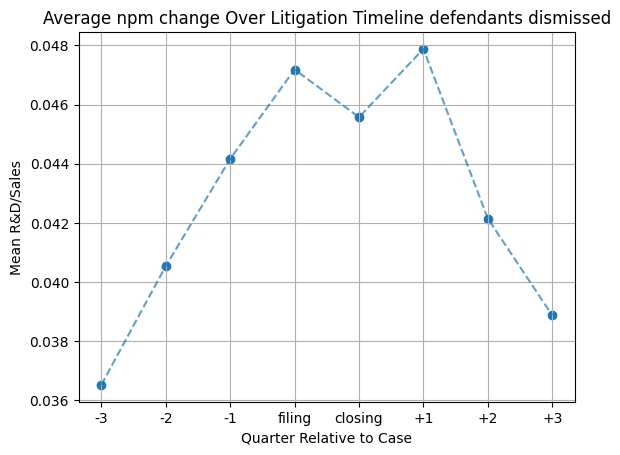

In [ ]:
temp = npm[npm['defendant'] == 1]
temp = temp[temp['disp_dismissed'] == 1]
temp = temp[temp['case_length'] == 0]

neg3q = temp['minus_three_npm'].mean()
neg2q = temp['minus_two_npm'].mean()
neg1q = temp['minus_one_npm'].mean()
negq0 = temp['filing_quarter_npm'].mean()

pos0 = temp['closing_quarter_npm'].mean()
pos1q = temp['plus_one_npm'].mean()
pos2q = temp['plus_two_npm'].mean()
pos3q = temp['plus_three_npm'].mean()

import matplotlib.pyplot as plt

# Y-values: your means
y_values = [neg3q, neg2q, neg1q, negq0, pos0, pos1q, pos2q, pos3q]

# X-tick labels
x_labels = ['-3', '-2', '-1', 'filing', 'closing', '+1', '+2', '+3']
x_positions = list(range(len(x_labels)))  # [0, 1, ..., 7]

# Plot
plt.scatter(x_positions, y_values)
plt.plot(x_positions, y_values, linestyle='--', alpha=0.7)  # optional: connect points
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Quarter Relative to Case')
plt.ylabel('Mean R&D/Sales')
plt.title('Average npm change Over Litigation Timeline defendants dismissed')
plt.grid(True)
plt.show()

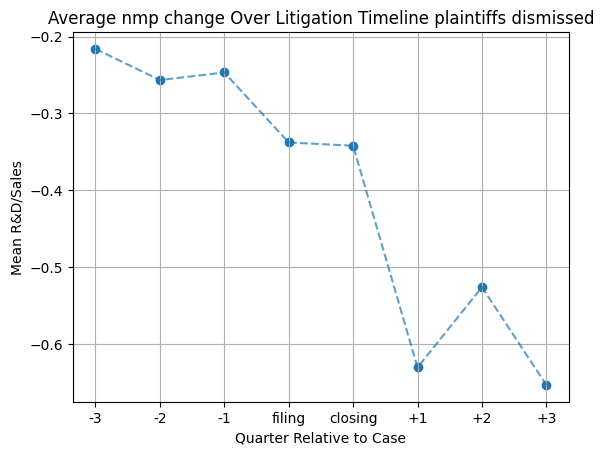

In [ ]:
temp = npm[npm['plaintiff'] == 1]
temp = temp[temp['disp_dismissed'] == 1]
temp = temp[temp['case_length'] == 0]

neg3q = temp['minus_three_npm'].mean()
neg2q = temp['minus_two_npm'].mean()
neg1q = temp['minus_one_npm'].mean()
negq0 = temp['filing_quarter_npm'].mean()

pos0 = temp['closing_quarter_npm'].mean()
pos1q = temp['plus_one_npm'].mean()
pos2q = temp['plus_two_npm'].mean()
pos3q = temp['plus_three_npm'].mean()

import matplotlib.pyplot as plt

# Y-values: your means
y_values = [neg3q, neg2q, neg1q, negq0, pos0, pos1q, pos2q, pos3q]

# X-tick labels
x_labels = ['-3', '-2', '-1', 'filing', 'closing', '+1', '+2', '+3']
x_positions = list(range(len(x_labels)))  # [0, 1, ..., 7]

# Plot
plt.scatter(x_positions, y_values)
plt.plot(x_positions, y_values, linestyle='--', alpha=0.7)  # optional: connect points
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Quarter Relative to Case')
plt.ylabel('Mean R&D/Sales')
plt.title('Average nmp change Over Litigation Timeline plaintiffs dismissed')
plt.grid(True)
plt.show()

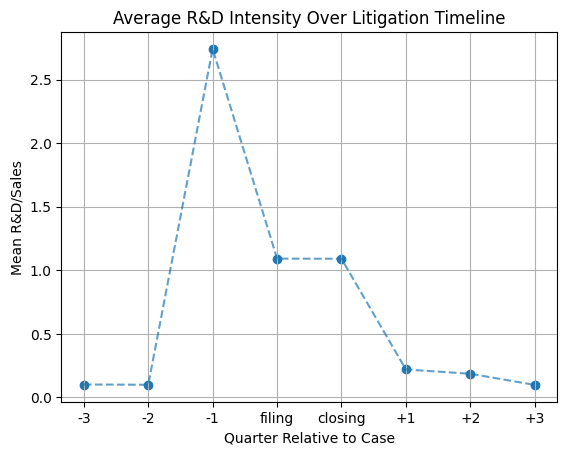

In [ ]:
temp = rnd[rnd['defendant'] == 1]
temp = temp[temp['disp_dismissed'] == 1]
temp = temp[temp['case_length'] == 0]

neg3q = temp['minus_three_rnd'].mean()
neg2q = temp['minus_two_rnd'].mean()
neg1q = temp['minus_one_rnd'].mean()
negq0 = temp['filing_quarter_rnd'].mean()

pos0 = temp['closing_quarter_rnd'].mean()
pos1q = temp['plus_one_rnd'].mean()
pos2q = temp['plus_two_rnd'].mean()
pos3q = temp['plus_three_rnd'].mean()

import matplotlib.pyplot as plt

# Y-values: your means
y_values = [neg3q, neg2q, neg1q, negq0, pos0, pos1q, pos2q, pos3q]

# X-tick labels
x_labels = ['-3', '-2', '-1', 'filing', 'closing', '+1', '+2', '+3']
x_positions = list(range(len(x_labels)))  # [0, 1, ..., 7]

# Plot
plt.scatter(x_positions, y_values)
plt.plot(x_positions, y_values, linestyle='--', alpha=0.7)  # optional: connect points
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Quarter Relative to Case')
plt.ylabel('Mean R&D/Sales')
plt.title('Average R&D Intensity Over Litigation Timeline')
plt.grid(True)
plt.show()

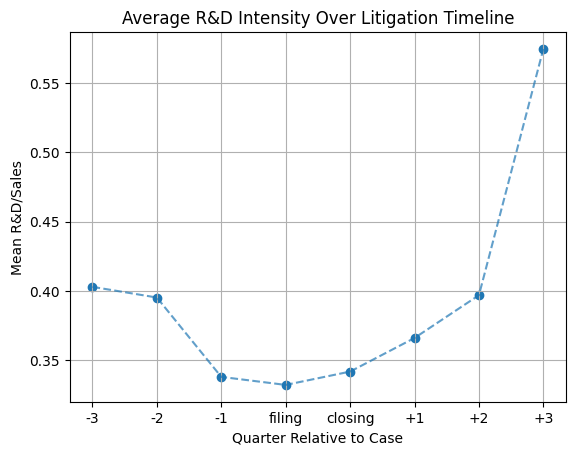

In [ ]:
temp = rnd[rnd['plaintiff'] == 1]
temp = temp[temp['disp_dismissed'] == 1]
temp = temp[temp['case_length'] == 0]
temp = temp[temp['dismissed_voluntary'] == 1]


neg3q = temp['minus_three_rnd'].mean()
neg2q = temp['minus_two_rnd'].mean()
neg1q = temp['minus_one_rnd'].mean()
negq0 = temp['filing_quarter_rnd'].mean()

pos0 = temp['closing_quarter_rnd'].mean()
pos1q = temp['plus_one_rnd'].mean()
pos2q = temp['plus_two_rnd'].mean()
pos3q = temp['plus_three_rnd'].mean()

import matplotlib.pyplot as plt

# Y-values: your means
y_values = [neg3q, neg2q, neg1q, negq0, pos0, pos1q, pos2q, pos3q]

# X-tick labels
x_labels = ['-3', '-2', '-1', 'filing', 'closing', '+1', '+2', '+3']
x_positions = list(range(len(x_labels)))  # [0, 1, ..., 7]

# Plot
plt.scatter(x_positions, y_values)
plt.plot(x_positions, y_values, linestyle='--', alpha=0.7)  # optional: connect points
plt.xticks(ticks=x_positions, labels=x_labels)
plt.xlabel('Quarter Relative to Case')
plt.ylabel('Mean R&D/Sales')
plt.title('Average R&D Intensity Over Litigation Timeline')
plt.grid(True)
plt.show()

In [ ]:
!pip install stargazer

In [ ]:
#importing some important packages
import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.core.display import display, HTML

In [ ]:
rnd.columns

Index(['case_number', 'filing_quarter_rnd', 'closing_quarter_rnd',
       'delta_rnd_sales', 'minus_one_rnd', 'minus_two_rnd', 'minus_three_rnd',
       'plus_one_rnd', 'plus_two_rnd', 'plus_three_rnd', 'state_province',
       'case_length', 'materials', 'industrials', 'consumer_discretionary',
       'info_tech', 'health_care', 'defendant', 'plaintiff', 'case_name',
       'PLT', 'DEF', 'CIRCUIT', 'DISTRICT', 'OFFICE', 'JURY', 'NOS', 'COUNTY',
       'disp_before_issue_joined', 'disp_dismissed', 'disp_judgment',
       'disp_transfer', 'dismissed_settlement', 'dismissed_voluntary',
       'judgment_favor_plt', 'judgment_favor_def', 'judgment_favor_both',
       'judgment_monetary_award', 'judgment_injunction',
       'judgment_ordered_loss'],
      dtype='object')

In [ ]:
# Fit OLS models
# Rename 'def' column to avoid conflict with Python keyword

model1 = smf.ols('delta_rnd_sales ~ disp_dismissed', data=rnd).fit()
model2 = smf.ols('delta_rnd_sales ~ disp_dismissed + filing_quarter_rnd + case_length + health_care + info_tech + industrials + consumer_discretionary + materials', data=rnd).fit()
model3 = smf.ols('delta_rnd_sales ~ disp_dismissed + filing_quarter_rnd + disp_dismissed:disp_before_issue_joined + disp_dismissed:dismissed_settlement + disp_dismissed:dismissed_voluntary + case_length + health_care + info_tech + industrials + consumer_discretionary + materials', data=rnd).fit()
model4 = smf.ols('delta_rnd_sales ~ defendant + filing_quarter_rnd + minus_one_rnd + minus_two_rnd + minus_three_rnd + disp_dismissed + disp_dismissed:defendant + disp_dismissed:disp_before_issue_joined + disp_dismissed:disp_before_issue_joined:defendant + disp_dismissed:dismissed_settlement + disp_dismissed:dismissed_settlement:defendant + disp_dismissed:dismissed_voluntary + disp_dismissed:dismissed_voluntary:defendant + case_length + health_care + info_tech + industrials + consumer_discretionary + materials', data=rnd).fit()


# Stargazer setup
stargazer = Stargazer([model1, model2, model3, model4])
stargazer.title('Regression Models Comparison')



# Rename covariates for display
stargazer.covariate_renames = {
    'delta_rnd': 'Percent Point Change in R&D to Sales Ratio',
    'disp_dismissed': 'Case Dismissal',
    'disp_dismissed:defendant': 'Dismissal:Defendant Firm', # Changed 'def' to 'defendant'
    'disp_dismissed:disp_before_issue_joined': 'Dismissal Before Issue Joinder',
    'disp_dismissed:disp_before_issue_joined:defendant': 'Dismissal Before Issue Joinder:Defendant Firm', # Changed 'def' to 'defendant'
    'disp_dismissed:dismissed_settlement': 'Dismissal with Settlement',
    'disp_dismissed:dismissed_settlement:defendant': 'Dismissal with Settlement:Defendant Firm', # Changed 'def' to 'defendant'
    'disp_dismissed:dismissed_voluntary': 'Voluntary Withdrawal',
    'disp_dismissed:dismissed_voluntary:defendant': 'Voluntary Withdrawal:Defendant Firm', # Changed 'def' to 'defendant'
    'case_length': 'Case Length in Days',
    'health_care': 'Healthcare Sector',
    'info_tech': 'I.T. Sector',
    'industrials': 'Industrials Sector',
    'consumer_discretionary': 'Consumer Discretionary Sector',
    'materials': 'Materials Sector'
}

# Reorder covariates for table display
stargazer.covariate_order = [
    'disp_dismissed',
    'disp_dismissed:defendant',
    'disp_dismissed:disp_before_issue_joined',
    'disp_dismissed:disp_before_issue_joined:defendant',
    'disp_dismissed:dismissed_settlement',
    'disp_dismissed:dismissed_settlement:defendant',
    'disp_dismissed:dismissed_voluntary',
    'disp_dismissed:dismissed_voluntary:defendant',
    'case_length',
    'health_care',
    'info_tech',
    'industrials',
    'consumer_discretionary',
    'materials'
]


# Render in notebook
html_output = stargazer.render_html()
display(HTML(html_output))

In [ ]:
npm.columns

Index(['case_number', 'filing_quarter_npm', 'closing_quarter_npm', 'delta_npm',
       'minus_one_npm', 'minus_two_npm', 'minus_three_npm', 'plus_one_npm',
       'plus_two_npm', 'plus_three_npm', 'state_province', 'case_length',
       'materials', 'industrials', 'consumer_discretionary', 'info_tech',
       'health_care', 'defendant', 'plaintiff', 'case_name', 'PLT', 'DEF',
       'CIRCUIT', 'DISTRICT', 'OFFICE', 'JURY', 'NOS', 'COUNTY',
       'disp_before_issue_joined', 'disp_dismissed', 'disp_judgment',
       'disp_transfer', 'dismissed_settlement', 'dismissed_voluntary',
       'judgment_favor_plt', 'judgment_favor_def', 'judgment_favor_both',
       'judgment_monetary_award', 'judgment_injunction',
       'judgment_ordered_loss', 'FED_QUESTION', 'US_DEF', 'US_PLT'],
      dtype='object')

In [ ]:
# Fit OLS models
# Rename 'def' column to avoid conflict with Python keyword

model1 = smf.ols('delta_npm ~ disp_dismissed', data=npm).fit()
model2 = smf.ols('delta_npm ~ disp_dismissed + filing_quarter_npm + case_length + health_care + info_tech ', data=npm).fit()
model3 = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_before_issue_joined + disp_dismissed:dismissed_settlement + disp_dismissed:dismissed_voluntary + filing_quarter_npm + case_length + health_care + info_tech ', data=npm).fit()
model4 = smf.ols('delta_npm ~ defendant + disp_dismissed + disp_dismissed:defendant + disp_dismissed:disp_before_issue_joined + disp_dismissed:disp_before_issue_joined:defendant + disp_dismissed:dismissed_settlement + disp_dismissed:dismissed_settlement:defendant + disp_dismissed:dismissed_voluntary + disp_dismissed:dismissed_voluntary:defendant + filing_quarter_npm + minus_one_npm + minus_two_npm + minus_three_npm + case_length + health_care + info_tech', data=npm).fit()


# Stargazer setup
stargazer = Stargazer([model1, model2, model3, model4])
stargazer.title('Regression Models Comparison')



# Rename covariates for display
stargazer.covariate_renames = {
    'disp_dismissed': 'Case Dismissal',
    'disp_dismissed:defendant': 'Dismissal:Defendant Firm', # Changed 'def' to 'defendant'
    'disp_dismissed:disp_before_issue_joined': 'Dismissal Before Issue Joinder',
    'disp_dismissed:disp_before_issue_joined:defendant': 'Dismissal Before Issue Joinder:Defendant Firm', # Changed 'def' to 'defendant'
    'disp_dismissed:dismissed_settlement': 'Dismissal with Settlement',
    'disp_dismissed:dismissed_settlement:defendant': 'Dismissal with Settlement:Defendant Firm', # Changed 'def' to 'defendant'
    'disp_dismissed:dismissed_voluntary': 'Voluntary Withdrawal',
    'disp_dismissed:dismissed_voluntary:defendant': 'Voluntary Withdrawal:Defendant Firm', # Changed 'def' to 'defendant'
    'case_length': 'Case Length in Days',
    'health_care': 'Healthcare Sector',
    'info_tech': 'I.T. Sector',
    'industrials': 'Industrials Sector',
    'consumer_discretionary': 'Consumer Discretionary Sector',
    'materials': 'Materials Sector'
}

# Reorder covariates for table display
stargazer.covariate_order = [
    'disp_dismissed',
    'disp_dismissed:defendant', # Changed 'def' to 'defendant'
    'disp_dismissed:disp_before_issue_joined',
    'disp_dismissed:disp_before_issue_joined:defendant', # Changed 'def' to 'defendant'
    'disp_dismissed:dismissed_settlement',
    'disp_dismissed:dismissed_settlement:defendant', # Changed 'def' to 'defendant'
    'disp_dismissed:dismissed_voluntary',
    'disp_dismissed:dismissed_voluntary:defendant', # Changed 'def' to 'defendant'
    'case_length',
    'health_care',
    'info_tech',
    'industrials',
    'consumer_discretionary',
    'materials'
]


# Render in notebook
html_output = stargazer.render_html()
display(HTML(html_output))

# Fitting Known-Valid Causal Models (RDD, DiD & Matched Case-Control Study)

# Fitting Text-Instrument Models (2sls and IV Causal Forrests)

In [ ]:
BERT_Predictions = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/BERT_Predictions.csv')

npm_iv = npm.merge(BERT_Predictions[['case_number', 'BERT_Logits']], on='case_number', how='left')
npm_iv = npm_iv.dropna()

rnd_iv = rnd.merge(BERT_Predictions[['case_number', 'BERT_Logits']], on='case_number', how='left')
rnd_iv = rnd_iv.dropna()

In [ ]:
rnd_iv.columns

Index(['case_number', 'filing_quarter_rnd', 'closing_quarter_rnd',
       'delta_rnd_sales', 'minus_one_rnd', 'minus_two_rnd', 'minus_three_rnd',
       'plus_one_rnd', 'plus_two_rnd', 'plus_three_rnd', 'state_province',
       'case_length', 'materials', 'industrials', 'consumer_discretionary',
       'info_tech', 'health_care', 'defendant', 'plaintiff', 'case_name',
       'PLT', 'DEF', 'CIRCUIT', 'DISTRICT', 'OFFICE', 'JURY', 'NOS', 'COUNTY',
       'disp_before_issue_joined', 'disp_dismissed', 'disp_judgment',
       'disp_transfer', 'dismissed_settlement', 'dismissed_voluntary',
       'judgment_favor_plt', 'judgment_favor_def', 'judgment_favor_both',
       'judgment_monetary_award', 'judgment_injunction',
       'judgment_ordered_loss', 'BERT_Logits'],
      dtype='object')

In [ ]:
!pip install linearmodels

In [ ]:
import pandas as pd
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import display, HTML

# ---- Sample DataFrame (replace with your real df) ----
# df = pd.read_csv("your_data.csv")

# ---- 2SLS Model ----
iv_model = IV2SLS.from_formula(
    'delta_rnd_sales ~ filing_quarter_rnd + case_length + health_care + info_tech + consumer_discretionary + materials + industrials + [disp_dismissed ~ BERT_Logits]',
    data=rnd_iv
).fit()

print(iv_model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:        delta_rnd_sales   R-squared:                      0.0022
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0002
No. Observations:                3975   F-statistic:                    21.209
Date:                Thu, Apr 17 2025   P-value (F-stat)                0.0066
Time:                        16:56:49   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                   Parameter Estimates                                    
                        Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------
filing_quarter_rnd      -1.98e-05  8.955e-05    -0.2211     0.8250     -0.0002      0.0002
case

In [ ]:
npm_iv.columns

Index(['case_number', 'filing_quarter_npm', 'closing_quarter_npm', 'delta_npm',
       'minus_one_npm', 'minus_two_npm', 'minus_three_npm', 'plus_one_npm',
       'plus_two_npm', 'plus_three_npm', 'state_province', 'case_length',
       'materials', 'industrials', 'consumer_discretionary', 'info_tech',
       'health_care', 'defendant', 'plaintiff', 'case_name', 'PLT', 'DEF',
       'CIRCUIT', 'DISTRICT', 'OFFICE', 'JURY', 'NOS', 'COUNTY',
       'disp_before_issue_joined', 'disp_dismissed', 'disp_judgment',
       'disp_transfer', 'dismissed_settlement', 'dismissed_voluntary',
       'judgment_favor_plt', 'judgment_favor_def', 'judgment_favor_both',
       'judgment_monetary_award', 'judgment_injunction',
       'judgment_ordered_loss', 'FED_QUESTION', 'US_DEF', 'US_PLT',
       'BERT_Logits'],
      dtype='object')

In [ ]:
import pandas as pd
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import display, HTML

# ---- Sample DataFrame (replace with your real df) ----
# df = pd.read_csv("your_data.csv")

# ---- 2SLS Model ----
iv_model = IV2SLS.from_formula(
    'delta_npm ~ filing_quarter_npm + [disp_dismissed ~ BERT_Logits]',
    data=npm_iv
).fit()

print(iv_model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              delta_npm   R-squared:                      0.0085
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0080
No. Observations:                3946   F-statistic:                    1.7079
Date:                Thu, Apr 17 2025   P-value (F-stat)                0.4257
Time:                        16:56:49   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                  
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
filing_quarter_npm    -0.0177     0.0136    -1.2998     0.1937     -0.0444      0.0090
disp_dismissed      